# Purpose of this project

In this project, we first start with a gaussian initial condition of the form
$$F(t=0)\to\sum\limits_n \delta_n r^n e^{i n \theta} e^{-r^2}\delta(v_z).$$
We actually start at $t=t_0$. As a result, we have
$$r^2\to r^2 + t_0^2 - 2 r t_0 \cos\phi_r$$
and $\phi$ is the azimuthal angle in the momentum space. For simplicity, we assume $\delta_n$ to be purely real. As a result, we can combine the $n$ and $-n$ harmonic decomposition. For example, for $n=2$, we have
$$\delta_2 e^{i 2 \theta}+\delta_{-2} e^{-i 2 \theta}=2\delta_2 \cos(2\theta)$$.
Free-streaming mixes $\theta$ and $\phi$ and one has
$$2 \delta_2 r^2 \cos(2\theta)\to \delta_2[ r^2 - 2 r t_0\cos\phi_r + t_0^2\cos(2\phi_r) + 2 i (r-t_0\cos\phi_r)t_0 ]e^{2i\theta}+c.c.$$

We shall first study the non-linear response including only $n = 0$ and $\pm2$.

# 1. Test FFT and Inverse FFT

In [1]:
import sys
sys.path.append('../code/')
from code.lattice import *
from code.initcond import *
from code.kernel import *
from code.kintran import *
from code.observable import *

In [6]:

latt = Lattice(('theta', 10),
                ('r tilde', 0.0, 5.0, 2),
                ('phir', 4),
                ('vz tilde', 0.0, 15.0, 4))
print(id(latt.lattice))

ic = InitCond('gaussian', 0.1, (2, 1.0))

t0 = 0.1
ob = Observable(t0, latt)

C = Kernel()

kt = KinTran(ic, latt, C)

#print(kt.F)

4794310344


In [2]:

latt = Lattice(('theta', 10),
                ('r tilde', 0.0, 5.0, 2),
                ('phir', 4),
                ('vz tilde', 0.0, 15.0, 4))
print(id(latt.lattice))

ic = InitCond('gaussian', 0.1, (2, 1.0))

t0 = 0.1
ob = Observable(t0, latt)

C = kernelITA(latt=latt, ob=ob)
print(id(C.latt.lattice))

kt = KinTran(ic, latt, C)

#print(kt.F)

4763402184
((2, 1.0),)


TypeError: __init__() got an unexpected keyword argument 'latt'

In [3]:
kt.F[:, 0, 0, 0]

array([200.69642931+0.j,   0.        +0.j,   2.00696429+0.j,
         0.        +0.j,   0.        +0.j,   0.        +0.j])

In [4]:
ob.calcphir()
C.Ftheta(kt.F, 0,0,0)

array([20.47103579+0.j, 20.19368015+0.j, 19.74490929+0.j, 19.74490929+0.j,
       20.19368015+0.j, 20.47103579+0.j, 20.19368015+0.j, 19.74490929+0.j,
       19.74490929+0.j, 20.19368015+0.j])

In [6]:
ic.gausstheta(latt)[:, 0, 0, 0]

array([20.47103579, 20.19368015, 19.74490929, 19.74490929, 20.19368015,
       20.47103579, 20.19368015, 19.74490929, 19.74490929, 20.19368015])

In [7]:
C.Ftheta(kt.F, 0,0,0)/ic.gausstheta(latt)[:, 0, 0, 0]

array([1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j])

In [8]:
np.sum(np.abs(C.Ftheta(kt.F, 0,0,0)-ic.gausstheta(latt)[:, 0, 0, 0]))

3.197442310920451e-14

# 2. Very $1^{st}$ run

In [1]:
import sys
sys.path.append('../code/')
from lattice import *
from observable import *
from kernel import *
from kintran import *
import numpy as np
from initcond import *
import timeit
from eshow import *

In [2]:
latt = Lattice(('r tilde', 0.0, 5.0, 41),
                ('vz tilde', 0.0, 15.0, 41),
                ('phir', 40),
                ('theta', 10))

In [3]:
t0 = 0.1
ob = Observable(t0, latt)
ic = InitCond('gaussian', t0, (2, 1.0))
C = kernelITA(ob=ob)
kt = KinTran(ic, latt, C)

((2, 1.0),)


In [4]:
ob.interp(kt.F)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  kx=kx, ky=ky, s=0.0)


In [5]:
ob.update()

In [6]:
ob.InterpRestFrame(0.2)

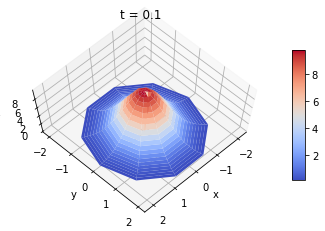

In [7]:
kt.showEnergyDensity()

In [ ]:
while kt.t <=2.0:
    kt.nextTime()
    kt.showEnergyDensity()